In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from data_prep import utils
import numpy as np # linear algebra
import matplotlib.pyplot as plt

# suppress warnings from pandas printing Nan and inf
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [5]:
data = pd.read_excel('dataset/SAP_Datasets.xlsx')
data.head()

,Country Name,Country Code,Indicator Name,Topic,short description,long description,Indicator Code,Unit of measure,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,Africa Eastern and Southern,AFE,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.271724,NaN,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,Africa Western and Central,AFW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.197514,NaN,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN


In [6]:
indicator_names = data[['Indicator Code', 'Indicator Name']].drop_duplicates()
indicator_map = dict(zip(indicator_names['Indicator Code'], indicator_names['Indicator Name']))
indicator_names = data[['Indicator Code', 'Indicator Name', 'Topic']].drop_duplicates()
indicator_names.set_index('Indicator Code')

country_names = data[['Country Name', 'Country Code']].drop_duplicates()
country_map = dict(zip(country_names['Country Code'], country_names['Country Name']))

In [8]:
table = utils.create_pair_df(data)
table.head()

CC.EST  DT.TDS.MLAT.PG.ZS  EG.CFT.ACCS.RU.ZS  \
Country Year                                                   
ABW     2000       NaN                NaN                NaN   
        2001       NaN                NaN                NaN   
        2002       NaN                NaN                NaN   
        2003       NaN                NaN                NaN   
        2004  1.165965                NaN                NaN   

              EG.CFT.ACCS.UR.ZS  EG.CFT.ACCS.ZS  EG.ELC.ACCS.RU.ZS  \
Country Year                                                         
ABW     2000                NaN             NaN              100.0   
        2001                NaN             NaN              100.0   
        2002                NaN             NaN              100.0   
        2003                NaN             NaN              100.0   
        2004                NaN             NaN              100.0   

              EG.ELC.ACCS.UR.ZS  EG.ELC.ACCS.ZS  GC.XPN.COMP.CN  \
Country Year                                                      
ABW     2000              100.0            91.7             NaN   
        2001              100.0           100.0             NaN   
        2002              100.0           100.0             NaN   
        2003              100.0           100.0             NaN   
        2004              100.0           100.0             NaN   

              GC.XPN.COMP.ZS  ...  SP.DYN.CBRT.IN  SP.DYN.WFRT  \
Country Year                  ...                                
ABW     2000             NaN  ...          14.427          NaN   
        2001             NaN  ...          13.739          NaN   
        2002             NaN  ...          12.992          NaN   
        2003             NaN  ...          12.621          NaN   
        2004             NaN  ...          11.921          NaN   

              SP.M15.2024.FE.ZS  SP.M18.2024.FE.ZS  SP.MTR.1519.ZS  \
Country Year                                                         
ABW     2000                NaN                NaN             NaN   
        2001                NaN                NaN             NaN   
        2002                NaN                NaN             NaN   
        2003                NaN                NaN             NaN   
        2004                NaN                NaN             NaN   

              SP.POP.DPND  SP.POP.DPND.OL  SP.POP.DPND.YG  SP.POP.TOTL  \
Country Year                                                             
ABW     2000    43.214659        9.909186       33.305473          NaN   
        2001    42.917251       10.217943       32.699308          NaN   
        2002    42.714310       10.598498       32.115812          NaN   
        2003    42.456933       10.970756       31.486177          NaN   
        2004    42.171019       11.364258       30.806760          NaN   

              SP.URB.TOTL.IN.ZS  
Country Year                     
ABW     2000             46.717  
        2001             46.339  
        2002             45.972  
        2003             45.606  
        2004             45.240  

[5 rows x 88 columns]

In [9]:
can_data = table.loc['CAN'].reset_index()
rus_data = table.loc['RUS'].reset_index()
chad_data = table.loc['TCD'].reset_index()
hic_data = table.loc['HIC'].reset_index()
yem_data = table.loc['YEM'].reset_index()

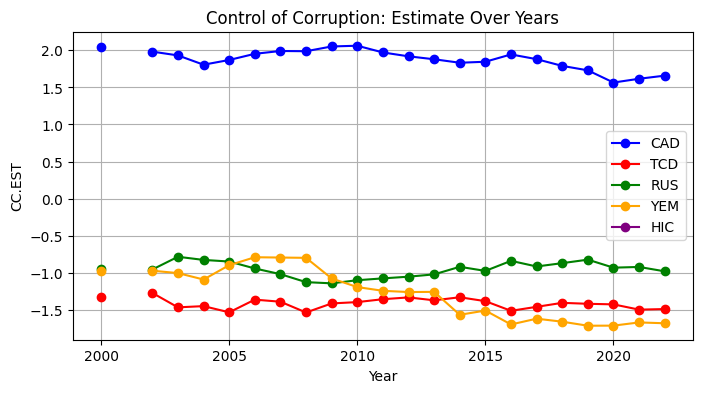

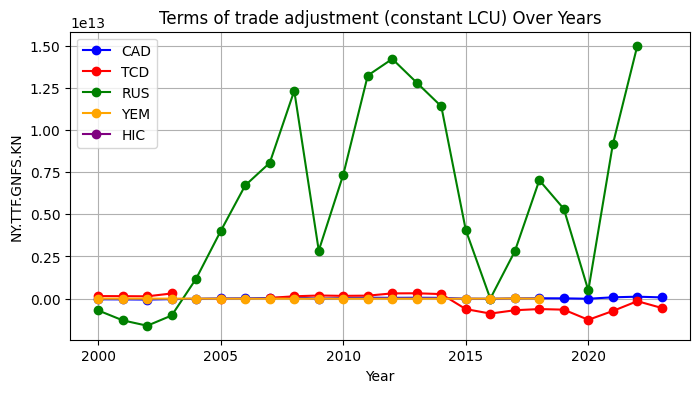

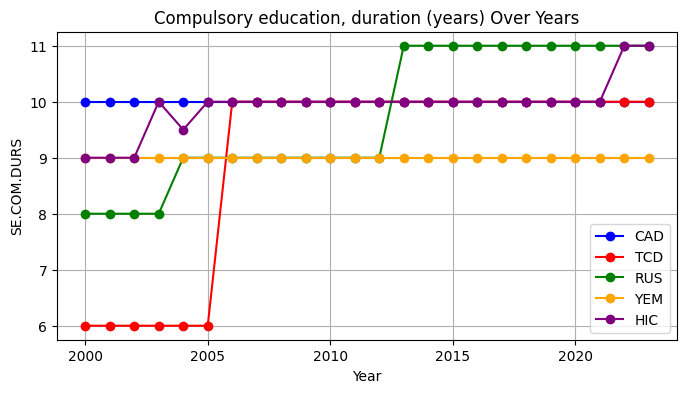

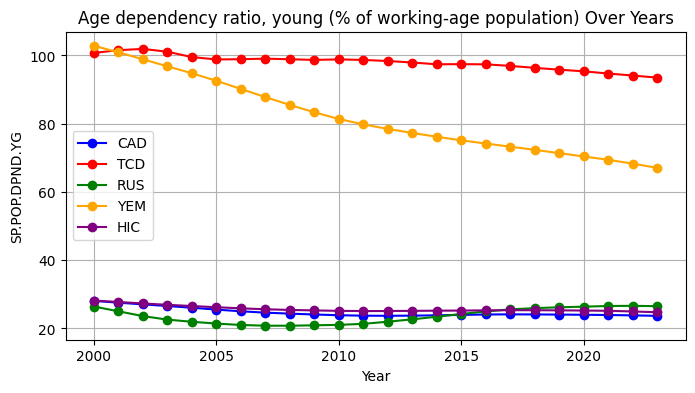

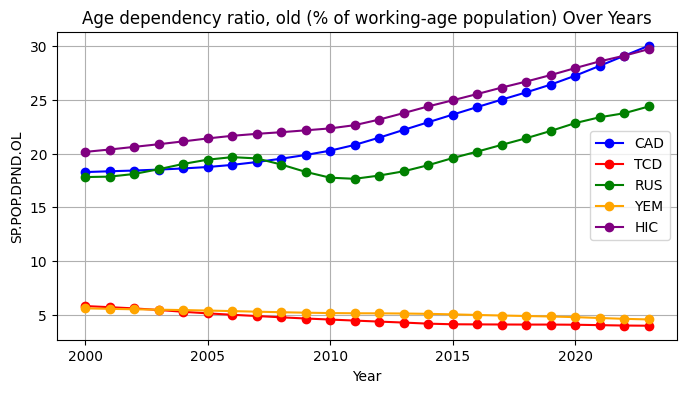

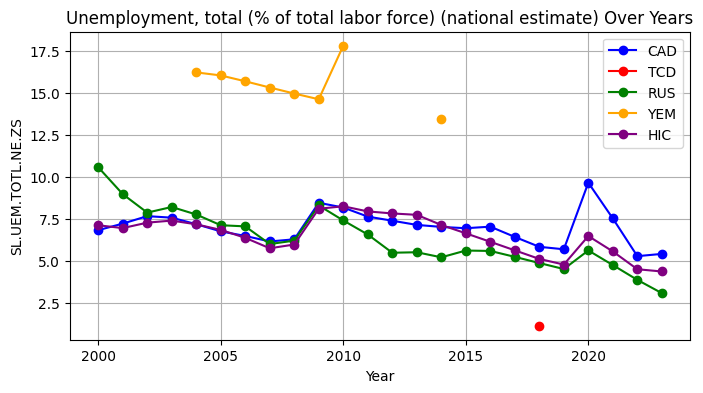

In [13]:
# lets plot some data from countries with different financial situation
looking = ["CC.EST", "NY.TTF.GNFS.KN", "SE.COM.DURS", "SP.POP.DPND.YG", "SP.POP.DPND.OL", "SL.UEM.TOTL.NE.ZS"]
for column in looking:
    plt.figure(figsize=(8, 4))
    plt.plot(can_data['Year'], can_data[column], marker='o', linestyle='-', label='CAD', color='blue')
    plt.plot(chad_data['Year'], chad_data[column], marker='o', linestyle='-', label='TCD', color='red')
    plt.plot(chad_data['Year'], rus_data[column], marker='o', linestyle='-', label='RUS', color='green')
    plt.plot(chad_data['Year'], yem_data[column], marker='o', linestyle='-', label='YEM', color='orange')
    plt.plot(hic_data['Year'], hic_data[column], marker='o', linestyle='-', label='HIC', color='purple')
    
    
    # Labels and title
    plt.xlabel("Year")
    plt.ylabel(column)
    plt.title(f"{indicator_map[column]} Over Years")
    plt.legend()
    plt.grid(True)
    
    # Show each plot separately
    plt.show()